In [8]:
import pandas as pd
import numpy as np
pd.set_option('max_columns',50)
pd.set_option('max_rows',500)

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
sns.set() 
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 
sns.set_style(style='white')
sns.set_context(context ='paper')

In [9]:
font_path = 'NanumSquareRoundR.ttf'
fontprop = fm.FontProperties(fname=font_path, size = 15)

In [10]:
outdoor_new = pd.read_csv('outdoor_new.csv', encoding = 'cp949')

In [11]:
# 상위 5개
outdoor_new.head()

,SENSOR_ID,MEASURE_DTTM,LAT,LON,TOTAL_ADDR,PM1,PM2,PM10,TEMPER,HUMI,TVOC,CO2,FORMALDEHYDE,BATTERY_INFO,SPEED,ILLUMINATION,ACCELERATE,USE_YN
0,A4C1386169A1,2018-10-10 오전 9:40,37.522477,126.898437,서울특별시 영등포구 당산동1가 185-53,20,52,59,14,57,NaN,NaN,NaN,93,4,1,1,Y
1,A4C1387F2678,2018-10-10 오전 9:40,37.515727,126.886703,서울특별시 영등포구 문래동5가 12-1,9,26,31,11,57,NaN,NaN,NaN,98,3,1,1,Y
2,A4C1385D13CD,2018-10-10 오전 9:39,37.508247,126.904482,서울특별시 영등포구 도림동 138-42,20,42,47,17,48,NaN,NaN,NaN,83,1,11,1,Y
3,A4C13860BD7D,2018-10-10 오전 9:38,37.523223,126.885262,서울특별시 영등포구 양평동2가 29-8,16,39,45,16,51,NaN,NaN,NaN,94,3,11,1,Y
4,A4C1385D3DCD,2018-10-10 오전 9:38,37.523975,126.958007,서울특별시 용산구 이촌동 411,16,36,48,14,60,NaN,NaN,NaN,14,1,11,1,Y


In [13]:
outdoor_new.columns = ['SENSOR_ID', 'MEASURE_DTTM', 'LAT',
       'LON', 'TOTAL_ADDR', 'PM1',
       'PM2', 'PM10', 'TEMPER',
       'HUMI', 'TVOC', 'CO2 ',
       'FORMALDEHYDE', 'BATTERY_INFO', 'SPEED',
       'ILLUMINATION', 'ACCELERATE', 'USE_YN']

In [14]:
# 컬럼 이름
outdoor_new.columns

Index(['SENSOR_ID', 'MEASURE_DTTM', 'LAT', 'LON', 'TOTAL_ADDR', 'PM1', 'PM2',
       'PM10', 'TEMPER', 'HUMI', 'TVOC', 'CO2 ', 'FORMALDEHYDE',
       'BATTERY_INFO', 'SPEED', 'ILLUMINATION', 'ACCELERATE', 'USE_YN'],
      dtype='object')

In [15]:
# xtick 그리기
xtick = list()

for i in range(24):
    xtick.append(str(i+1))

In [16]:
def pm2_by_sensor(sensor_id):
    # 데이터프레임 만들기
    sensor_df = outdoor_new[lambda x: x['SENSOR_ID'] == sensor_id].reset_index()
    sensor_df = sensor_df.drop(['index'], axis = 1)
    
    # 시간 컬럼 따로 만들기
    HOUR = list()

    for i in range(len(sensor_df)):
        if sensor_df['MEASURE_DTTM'][i].split(' ')[1] == '오전':
            HOUR.append(int(sensor_df['MEASURE_DTTM'][i].split(' ')[2].split(':')[0]))
        else:
            HOUR.append(int(sensor_df['MEASURE_DTTM'][i].split(' ')[2].split(':')[0])+12)
        
    for i in range(len(HOUR)):
        if HOUR[i] == 12:
            HOUR[i] = 24
        elif HOUR[i] == 24:
            HOUR[i] = 12
    
    sensor_df['HOUR'] = HOUR
    
    # 시간별 평균값 데이터
    sensor_df = sensor_df.groupby(['HOUR']).mean().reset_index()
    
    # 그래프 그리기
    plt.figure(figsize=(12, 6))
    plt.plot(sensor_df['HOUR'], sensor_df['PM2'], marker = 'o')
    sns.despine()
    plt.title("SENSOR_ID = {}".format(sensor_id), fontproperties=fontprop)
    plt.tick_params(labelsize=15) 
    plt.xticks(np.arange(24)+1, xtick)
    plt.xlabel('시간', fontproperties=fontprop)
    plt.ylabel('PM2', fontproperties=fontprop)

In [17]:
def pm2_by_sensor_day(sensor_id, year, month, day):
    # 데이터프레임 만들기
    sensor_df = outdoor_new[lambda x: x['SENSOR_ID'] == sensor_id].reset_index()
    sensor_df = sensor_df.drop(['index'], axis = 1)
    
    # 시간 컬럼 따로 만들기
    HOUR = list()

    for i in range(len(sensor_df)):
        if sensor_df['MEASURE_DTTM'][i].split(' ')[1] == '오전':
            HOUR.append(int(sensor_df['MEASURE_DTTM'][i].split(' ')[2].split(':')[0]))
        else:
            HOUR.append(int(sensor_df['MEASURE_DTTM'][i].split(' ')[2].split(':')[0])+12)
        
    for i in range(len(HOUR)):
        if HOUR[i] == 12:
            HOUR[i] = 24
        elif HOUR[i] == 24:
            HOUR[i] = 12
    
    sensor_df['HOUR'] = HOUR
    
    # year
    YEAR = list()

    for i in range(len(sensor_df)):
        YEAR.append(int(sensor_df['MEASURE_DTTM'][i].split(' ')[0].split('-')[0]))
    
    sensor_df['YEAR'] = YEAR
    
    # month
    MONTH = list()

    for i in range(len(sensor_df)):
        MONTH.append(int(sensor_df['MEASURE_DTTM'][i].split(' ')[0].split('-')[1]))
    
    sensor_df['MONTH'] = MONTH
    
    # day
    DAY = list()

    for i in range(len(sensor_df)):
        DAY.append(int(sensor_df['MEASURE_DTTM'][i].split(' ')[0].split('-')[2]))
    
    sensor_df['DAY'] = DAY
    
    # 해당 날짜에 대한 row만 따로 데이터로 만들기
    sensor_df = sensor_df[lambda x: x['YEAR'] == year][lambda x: x['MONTH'] == month][lambda x: x['DAY'] == day]
    
    # 시간별 평균값 데이터
    sensor_df = sensor_df.groupby(['HOUR']).mean().reset_index()
    
    # 그래프 그리기
    plt.figure(figsize=(12, 6))
    plt.plot(sensor_df['HOUR'], sensor_df['PM2'], marker = 'o')
    sns.despine()
    plt.title("SENSOR_ID = {}  /  날짜 = {}년 {}월 {}일".format(sensor_id, year, month, day), fontproperties=fontprop)
    plt.tick_params(labelsize=15) 
    plt.xticks(np.arange(24)+1, xtick)
    plt.xlabel('시간', fontproperties=fontprop)
    plt.ylabel('PM2', fontproperties=fontprop)

In [18]:
def city_by_sensor(sensor_id):
    # 데이터프레임 만들기
    sensor_df = outdoor_new[lambda x: x['SENSOR_ID'] == sensor_id].reset_index()
    sensor_df = sensor_df.drop(['index'], axis = 1)
    
    city_list = sensor_df['TOTAL_ADDR'].unique()
    
    print(city_list)

In [23]:
outdoor_temp = outdoor_new.dropna(subset = ['TOTAL_ADDR']).reset_index()
outdoor_temp = outdoor_temp.drop(['index'], axis = 1)

In [25]:
ADDR = list()

for i in range(len(outdoor_temp)):
    add_list = outdoor_temp['TOTAL_ADDR'][i].split(' ')
    add_list = add_list[:-1]
        
    add = ''
    for j in range(len(add_list)):
        add = add + ' ' + add_list[j]
        
    add = add[1:]
    ADDR.append(add)
    
outdoor_temp['ADDR'] = ADDR

In [27]:
def pm2_by_city(city, year, month, day):
    # null값 제거
    outdoor_temp = outdoor_new.dropna(subset = ['TOTAL_ADDR']).reset_index()
    outdoor_temp = outdoor_temp.drop(['index'], axis = 1)
    
    # 지역명 정리
    ADDR = list()

    for i in range(len(outdoor_temp)):
        add_list = outdoor_temp['TOTAL_ADDR'][i].split(' ')
        add_list = add_list[:-1]
        
        add = ''
        for j in range(len(add_list)):
            add = add + ' ' + add_list[j]
        
        add = add[1:]
        ADDR.append(add)
    
    outdoor_temp['ADDR'] = ADDR    
    
    # 지역별로 데이터프레임 묶기
    city_df = outdoor_temp[lambda x: x['ADDR'] == city].reset_index()
    
    # 시간 컬럼 따로 만들기
    HOUR = list()

    for i in range(len(city_df)):
        if city_df['MEASURE_DTTM'][i].split(' ')[1] == '오전':
            HOUR.append(int(city_df['MEASURE_DTTM'][i].split(' ')[2].split(':')[0]))
        else:
            HOUR.append(int(city_df['MEASURE_DTTM'][i].split(' ')[2].split(':')[0])+12)
        
    for i in range(len(HOUR)):
        if HOUR[i] == 12:
            HOUR[i] = 24
        elif HOUR[i] == 24:
            HOUR[i] = 12
    
    city_df['HOUR'] = HOUR
    
    # year
    YEAR = list()

    for i in range(len(city_df)):
        YEAR.append(int(city_df['MEASURE_DTTM'][i].split(' ')[0].split('-')[0]))
    
    city_df['YEAR'] = YEAR
    
    # month
    MONTH = list()

    for i in range(len(city_df)):
        MONTH.append(int(city_df['MEASURE_DTTM'][i].split(' ')[0].split('-')[1]))
    
    city_df['MONTH'] = MONTH
    
    # day
    DAY = list()

    for i in range(len(city_df)):
        DAY.append(int(city_df['MEASURE_DTTM'][i].split(' ')[0].split('-')[2]))
    
    city_df['DAY'] = DAY
    
    # 해당 날짜에 대한 row만 따로 데이터로 만들기
    city_df = city_df[lambda x: x['YEAR'] == year][lambda x: x['MONTH'] == month][lambda x: x['DAY'] == day]  
    
    # 시간별 평균값 데이터
    city_df = city_df.groupby(['HOUR']).mean().reset_index()
    
    # 그래프 그리기
    plt.figure(figsize=(12, 6))
    plt.plot(city_df['HOUR'], city_df['PM2'], marker = 'o')
    sns.despine()
    plt.title("지역 = {}  /  날짜 = {}년 {}월 {}일".format(city, year, month, day), fontproperties=fontprop)
    plt.tick_params(labelsize=15) 
    plt.xticks(np.arange(24)+1, xtick)
    plt.xlabel('시간', fontproperties=fontprop)
    plt.ylabel('PM2', fontproperties=fontprop)    

In [29]:
def percent_of_PM2(a, b):
    print(round(len(outdoor_new[(outdoor_new.PM2 > a) & (outdoor_new.PM2 < b)]) / len(outdoor_new)* 100,2),'%' )

In [30]:
def PM2_and_HUMI_graph(x):
    plt.figure(figsize = (10,10))
    a = outdoor_new[outdoor_new['PM2'] < x]
    plt.scatter(a['HUMI'], a['PM2'], s = 3)
    sns.despine()
    plt.tick_params(labelsize=15) 
    plt.xlabel('HUMI',fontproperties=fontprop)
    plt.ylabel('PM2',fontproperties=fontprop)
    plt.title('PM2, HUMI scatter 그래프',fontproperties=fontprop)
    plt.grid(False)
    plt.show()

In [31]:
def time_graph_of_PM2_HUMI():    
    h = list()

    for i in range(len(outdoor_new)):
        if outdoor_new['MEASURE_DTTM'][i].split(' ')[1] == '오전':
            h.append(int(outdoor_new['MEASURE_DTTM'][i].split(' ')[2].split(':')[0]))
        else:
            h.append(int(outdoor_new['MEASURE_DTTM'][i].split(' ')[2].split(':')[0])+12)

    for i in range(len(h)):
        if h[i] == 12:
            h[i] = 24
        elif h[i] == 24:
            h[i] = 12

    outdoor_new['HOUR'] = h

    m = list()

    for i in range(len(outdoor_new)):
        m.append(int(outdoor_new['MEASURE_DTTM'][i].split(' ')[2].split(':')[1]))

    outdoor_new['MINUTE'] = m

    plt.subplots(figsize = (16,10))

    graph_PM2 = outdoor_new.groupby(['HOUR','MINUTE'])['PM2'].mean().plot(linewidth = 0.4)
    graph_HUMI = outdoor_new.groupby(['HOUR','MINUTE'])['HUMI'].mean().plot(linewidth = 0.4)
    sns.despine()
    plt.tick_params(labelsize=15) 
    graph_PM2.set_title('PM2, HUMI 시계열 그래프(hour, minute)',fontproperties=fontprop)
    graph_PM2.set_ylabel('수치',fontproperties=fontprop)
    plt.grid(False)
    plt.legend()
    plt.show()

In [32]:
def time_graph_of_PM2_HUMI_2():
    h = list()

    for i in range(len(outdoor_new)):
        if outdoor_new['MEASURE_DTTM'][i].split(' ')[1] == '오전':
            h.append(int(outdoor_new['MEASURE_DTTM'][i].split(' ')[2].split(':')[0]))
        else:
            h.append(int(outdoor_new['MEASURE_DTTM'][i].split(' ')[2].split(':')[0])+12)

    for i in range(len(h)):
        if h[i] == 12:
            h[i] = 24
        elif h[i] == 24:
            h[i] = 12

    outdoor_new['HOUR'] = h

    m = list()

    for i in range(len(outdoor_new)):
        m.append(int(outdoor_new['MEASURE_DTTM'][i].split(' ')[2].split(':')[1]))

    outdoor_new['MINUTE'] = m
    
    plt.figure(figsize = (16,10))

    graph_PM2 = outdoor_new.groupby('HOUR')['PM2'].mean().plot(marker = 'o')
    graph_HUMI = outdoor_new.groupby('HOUR')['HUMI'].mean().plot(marker = 'o')
    sns.despine()
    plt.tick_params(labelsize=15) 
    graph_PM2.set_xticks([1,3,5,7,9,11,13,15,17,19,21,23])
    graph_PM2.set_ylabel('수치',fontproperties=fontprop)
    graph_PM2.set_title('PM2, HUMI 시계열 그래프(hour)',fontproperties=fontprop)
    plt.xticks(np.arange(24)+1, xtick)
    plt.legend()
    plt.grid(False)
    plt.show()

## 전체 데이터 중 특정 수치의 PM2가 차지하는 비율

percent_of_PM2(a, b) --> a이상 b이하인 PM2의 비율

In [33]:
# 괄호에 PM2의 수치를 적으시면 됩니다. (이상, 이하)
percent_of_PM2(10,40)

48.13 %


## 전체 데이터 >> PM2와 HUMI의 scatter 그래프

PM2_and_HUMI_graph(a) --> a 이하 수치의 PM2에 대해서 습도와 산점도를 보여줌

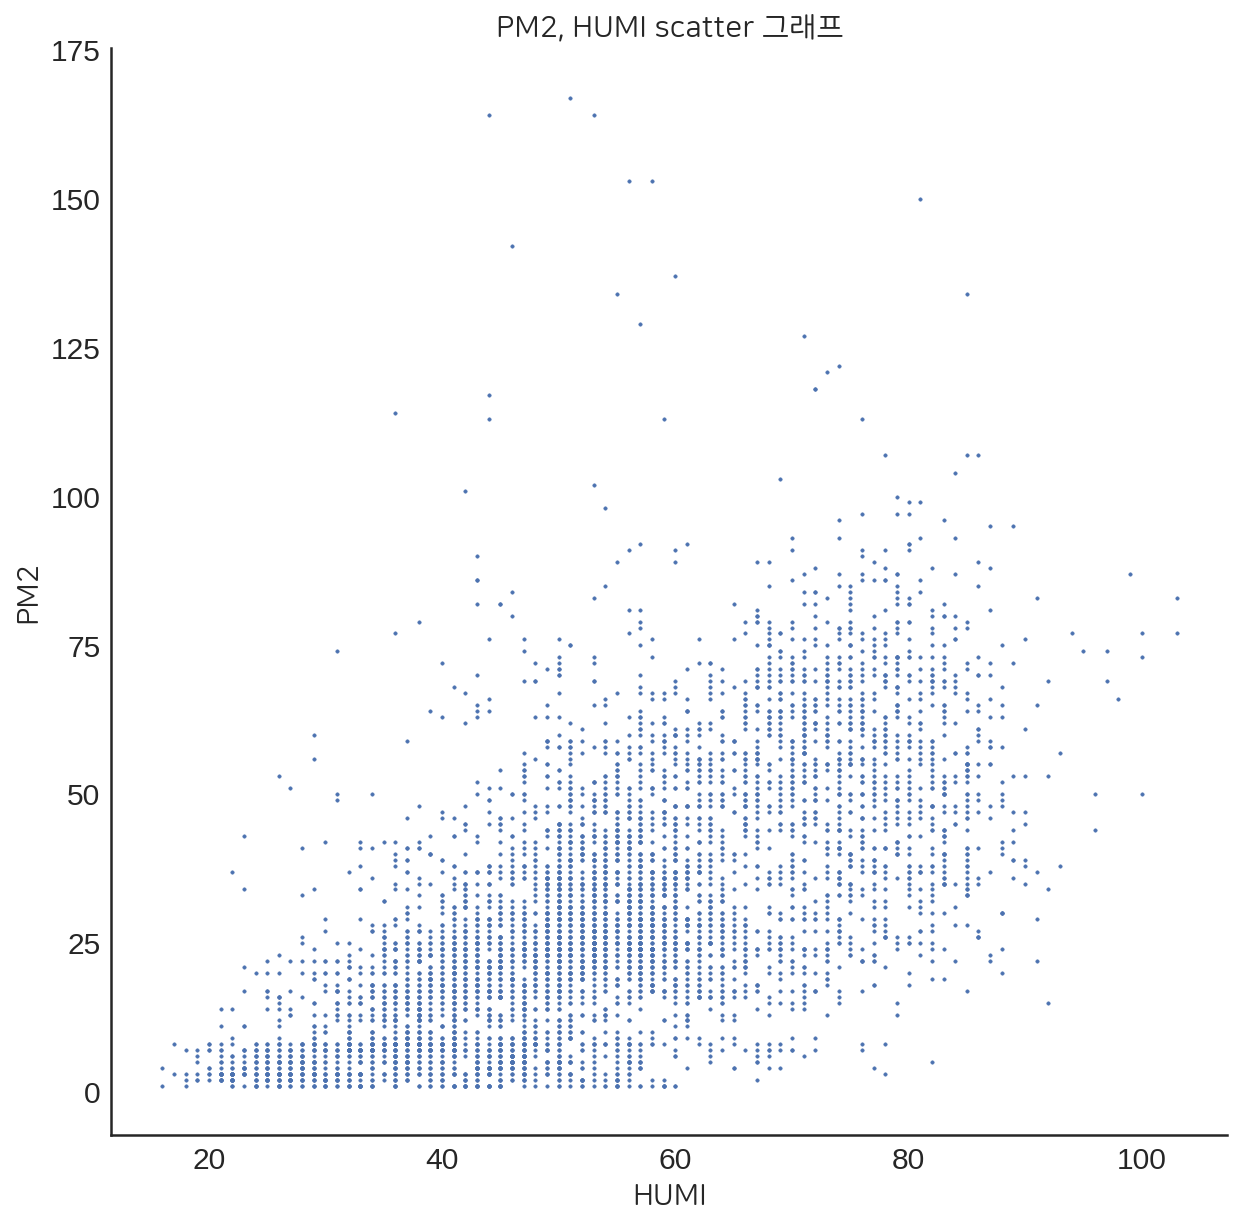

In [34]:
# PM2가 너무 높은 경우가 있기 때문에
# 괄호에 원하시는 PM2 수치를 넣으시면 됩니다. (해당 수치 이하의 PM2를 보여줌)
PM2_and_HUMI_graph(200)

## 전체 데이터 >> PM2, HUMI 시계열 그래프
#### * 전체 PM2, HUMI를 시간별로 평균을 내어 그린 그래프

time_graph_of_PM2_HUMI() --> parameter 없음

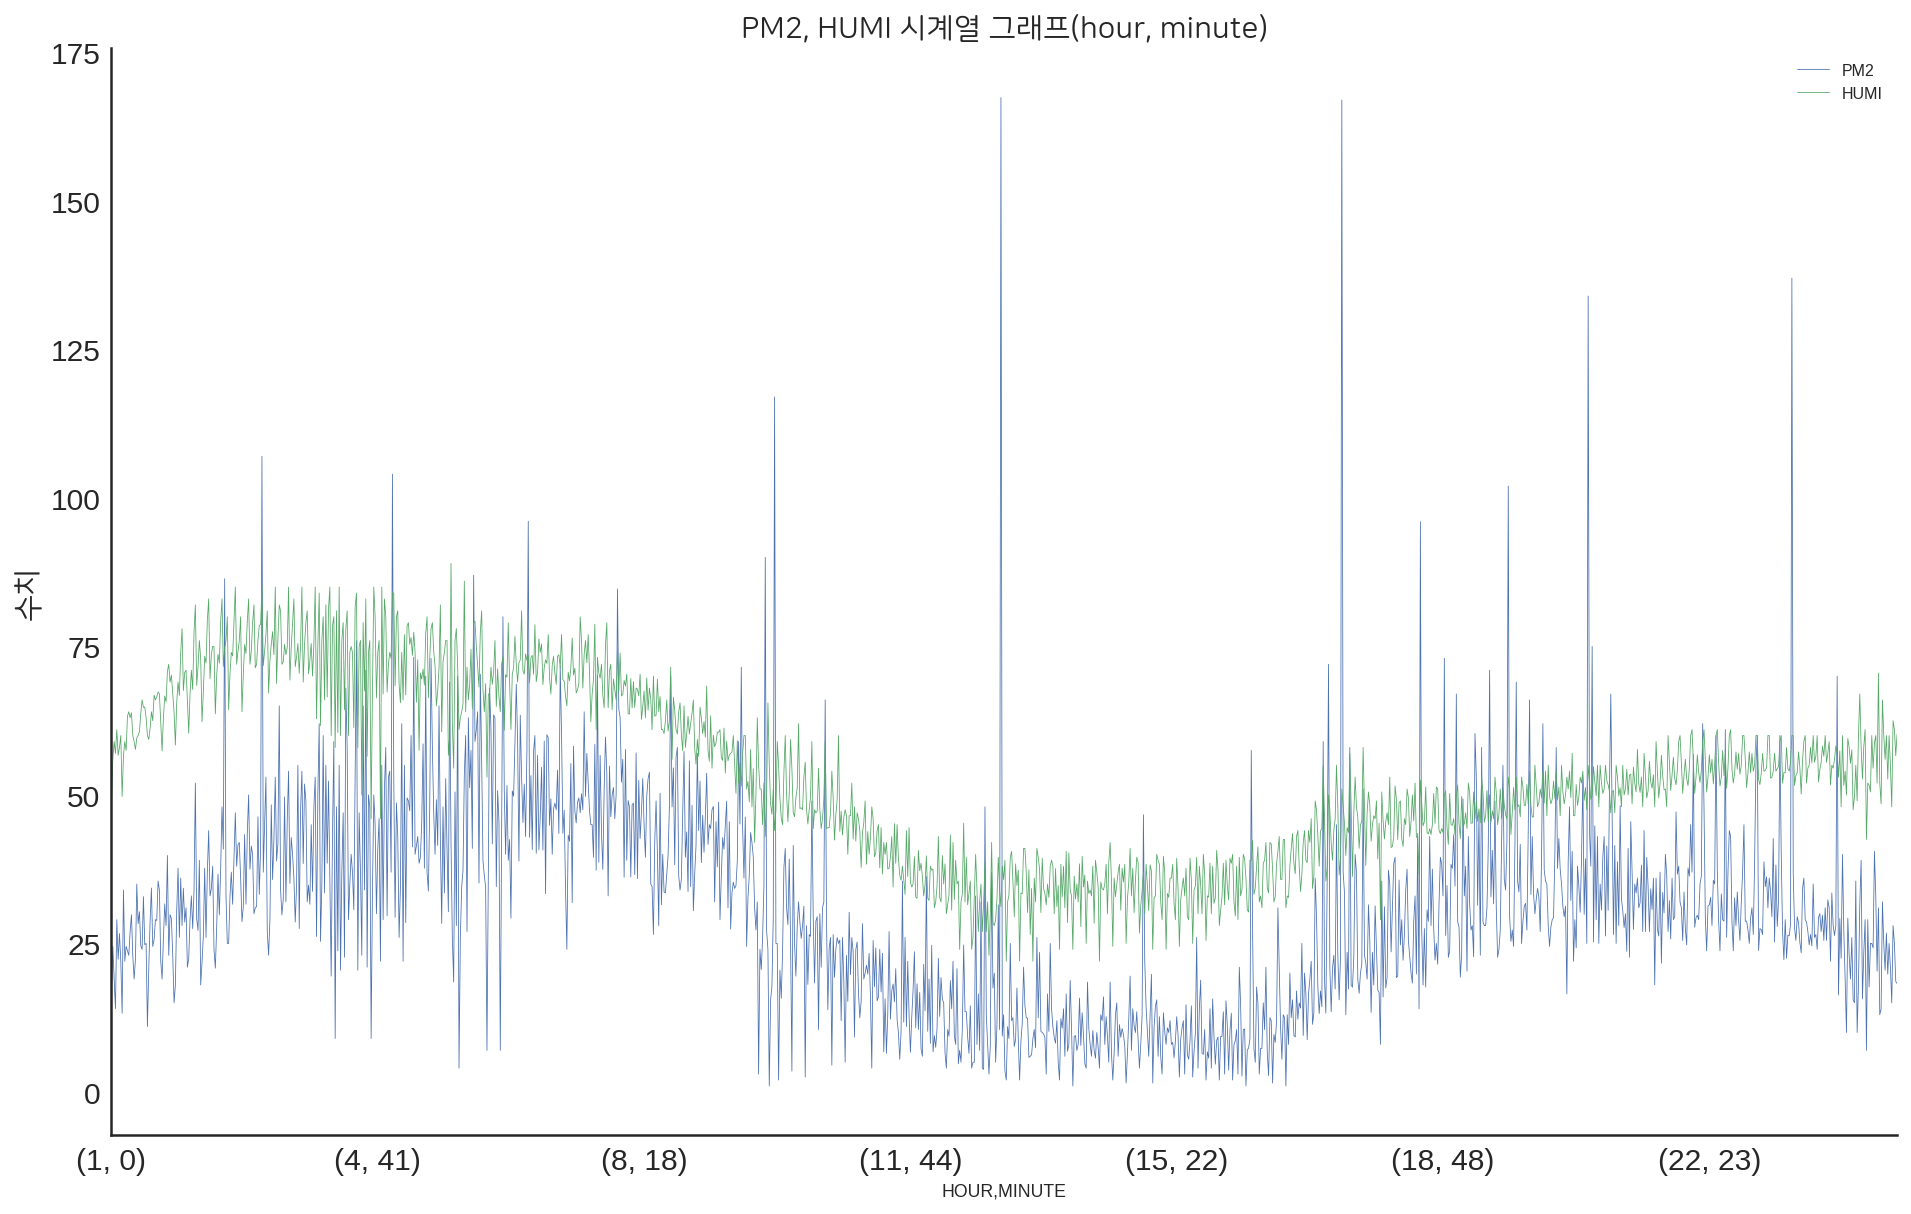

In [35]:
# 그냥 shift + enter 만 누르면 됩니다.
# x 축 : (시, 분) 입니다.
time_graph_of_PM2_HUMI()

## 모든 센서 아이디 리스트

In [19]:
outdoor_new['SENSOR_ID'].unique()

array(['A4C1386169A1', 'A4C1387F2678', 'A4C1385D13CD', 'A4C13860BD7D',
       'A4C1385D3DCD', 'A4C1385CCCCD', 'A4C13866E977', 'A4C1387E787A',
       'A4C138607DB5', 'A4C1385D0DCE', 'A4C1385C5ACD', 'A4C138605D9F',
       'A4C1385D53CE', 'A4C138604379', 'A4C138601A9E', 'A4C1385C79CC',
       'A4C1385CADCD', 'A4C1387F7C6A', 'A4C1385C64CD', 'A4C1385CDCCD',
       'A4C1387E996F', 'A4C1385D3ECE', 'A4C13860FAA1', 'A4C13861067C',
       'A4C1387ED06C', 'A4C1385CBACD', 'A4C1385D24CE', 'A4C1386137B3',
       'A4C1385D0BCE', 'A4C1385D34CD', 'A4C1385D3CCE', 'A4C138619877',
       'A4C1385C73CC', 'A4C1381000F0', 'A4C1387E035C', 'A4C1387F4C68',
       'A4C1385C6ECC', 'A4C13861539F', 'A4C1385D12CE', 'A4C13860D59E',
       'A4C1385CDF90', 'A4C1386038A2', 'A4C13860FE7E', 'A4C1386175A1',
       'A4C13860719E', 'A4C13860FC9F', 'A4C138612AB2', 'A4C1385C54CD',
       'A4C138610B9F', 'A4C1387E2C73', 'A4C13860BAA1', 'A4C13860C6A1',
       'A4C1385D25CE', 'A4C1386061A3', 'A4C1385C4BCC', 'A4C13860BCA2',
      

## 센서별 그래프 >> 모든 날짜 통합

pm2_by_sensor('센서값')

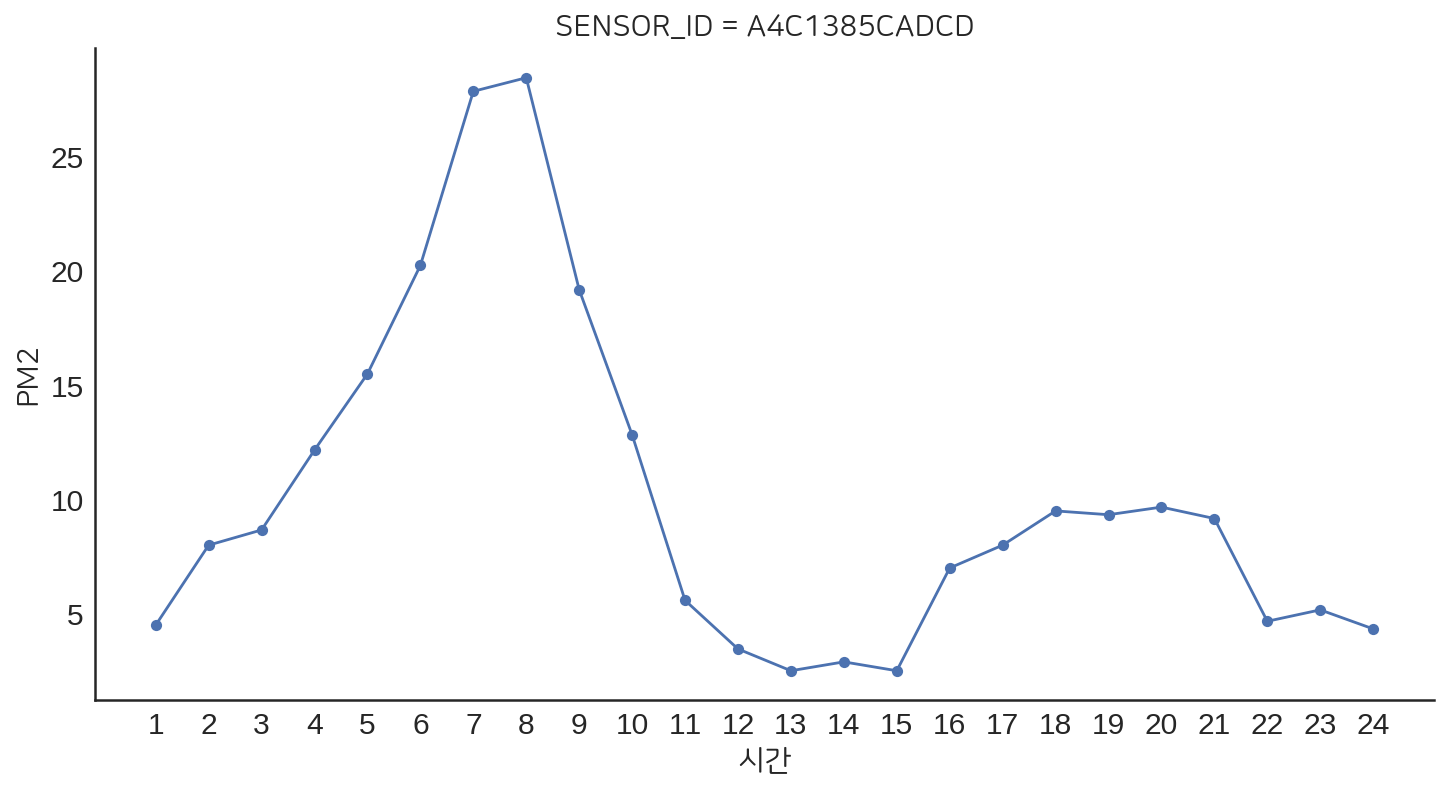

In [20]:
# 따옴표 안에 알고 싶은 센서값 붙여넣기
pm2_by_sensor('A4C1385CADCD')

## 센서별 그래프 >> 각 날짜별로

pm2_by_sensor_day('센서값', 년, 월, 일)

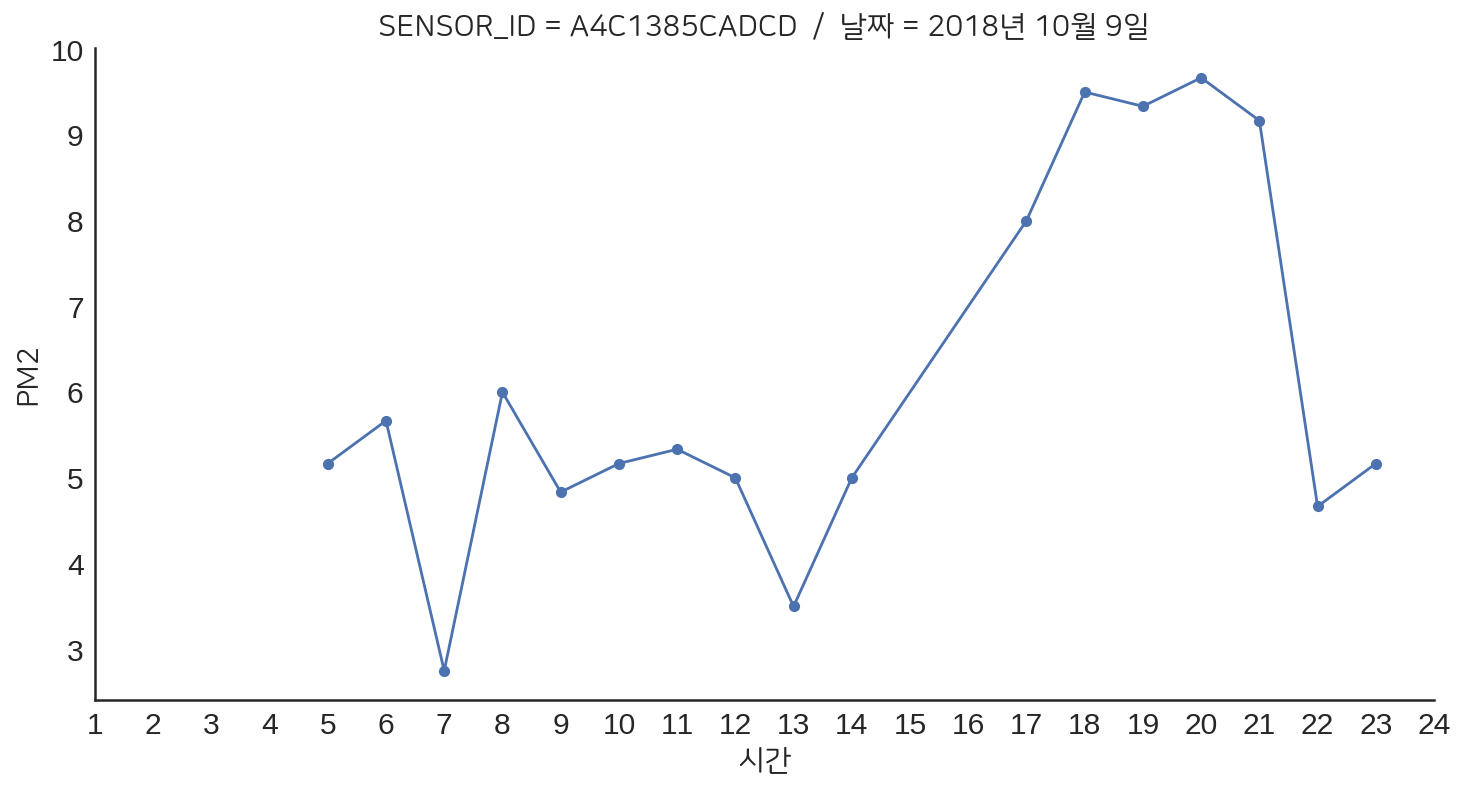

In [21]:
# 따옴표 안에 알고 싶은 센서값, 그 뒤에 차례로 년, 월, 일 숫자값 입력
pm2_by_sensor_day('A4C1385CADCD', 2018, 10, 9)

## 센서가 지나간 지역 목록

pm2_city_by_sensor('센서값')

In [22]:
# 따옴표 안에 알고 싶은 센서값 붙여넣기
city_by_sensor('A4C1385CADCD')

['경기도 수원시 팔달구 우만동 375-2' '경기도 수원시 팔달구 우만동 364' '경기도 수원시 팔달구 우만동 520-14'
 '경기도 수원시 팔달구 우만동 190-1' '경기도 수원시 팔달구 우만동 528-9' '경기도 수원시 팔달구 우만동 526-29'
 '경기도 수원시 팔달구 우만동 477' '경기도 수원시 팔달구 우만동 590' '경기도 수원시 팔달구 우만동 582'
 '경기도 수원시 팔달구 우만동 357-1' '경기도 수원시 영통구 이의동 1381-1' '경기도 수원시 영통구 이의동 841-3'
 '경기도 수원시 영통구 이의동 867' '경기도 수원시 영통구 이의동 906-4' '경기도 수원시 팔달구 우만동 533'
 '경기도 수원시 팔달구 우만동 605' '경기도 수원시 팔달구 우만동 532-29' '경기도 수원시 팔달구 우만동 526-12'
 '경기도 수원시 팔달구 우만동 509-13' '경기도 수원시 팔달구 우만동 509-10' '경기도 수원시 팔달구 우만동 509-7'
 '경기도 수원시 팔달구 우만동 528-13' '경기도 수원시 팔달구 우만동 509-9' '경기도 수원시 팔달구 우만동 511-12'
 '경기도 수원시 팔달구 우만동 511-10' '경기도 수원시 팔달구 우만동 509-3' '경기도 수원시 팔달구 우만동 509-5'
 '경기도 수원시 팔달구 우만동 509-6' '경기도 수원시 팔달구 우만동 545' '경기도 수원시 팔달구 우만동 528-11'
 '경기도 수원시 팔달구 우만동 528-10' '경기도 수원시 팔달구 지동 478-12' '경기도 수원시 팔달구 우만동 528-2'
 '경기도 수원시 팔달구 우만동 511-25' '경기도 수원시 팔달구 우만동 528-1' '경기도 수원시 팔달구 우만동 527-4'
 '경기도 수원시 팔달구 우만동 527-3' '경기도 수원시 팔달구 우만동 511-34' '경기도 수원시 팔달구 우만동 511-24'
 '경기도 수원시 팔달구 우만동 509-21' '경기도 수원시 팔달구 우만동 528' '경기도

## 각 지역의 날짜별 미세먼지 농도 그래프

pm2_by_city('지역명', 년, 월, 일)

In [26]:
# 이 코드의 결과로 나온 지역을 볼 수 있습니다.
outdoor_temp['ADDR'].unique()

array(['서울특별시 영등포구 당산동1가', '서울특별시 영등포구 문래동5가', '서울특별시 영등포구 도림동',
       '서울특별시 영등포구 양평동2가', '서울특별시 용산구 이촌동', '서울특별시 금천구 독산동',
       '서울특별시 서초구 방배동', '서울특별시 금천구 가산동', '서울특별시 양천구 신정동', '서울특별시 구로구 개봉동',
       '서울특별시 양천구 목동', '경기도 수원시 영통구 이의동', '경기도 용인시 수지구 풍덕천동',
       '서울특별시 중랑구 망우동', '경기도 수원시 팔달구 우만동', '서울특별시 구로구 구로동',
       '서울특별시 송파구 문정동', '서울특별시 중랑구 면목동', '경기도 고양시 일산동구 장항동',
       '경기도 성남시 중원구 상대원동', '서울특별시 종로구 봉익동', '경기도 성남시 분당구 삼평동',
       '서울특별시 강남구 삼성동', '서울특별시 중구 필동1가', '서울특별시 영등포구 영등포동',
       '서울특별시 중구 충무로2가', '서울특별시 강남구 도곡동', '서울특별시 송파구 가락동',
       '서울특별시 영등포구 문래동4가', '서울특별시 영등포구 양평동1가', '경기도 성남시 분당구 서현동',
       '경기도 시흥시 정왕동', '경기도 남양주시 퇴계원면 퇴계원리', '서울특별시 영등포구 영등포동6가',
       '서울특별시 종로구 수송동', '서울특별시 중구 충무로3가', '서울특별시 서초구 서초동',
       '서울특별시 영등포구 신길동', '경기도 성남시 분당구 금곡동', '서울특별시 영등포구 문래동6가',
       '서울특별시 종로구 도렴동', '서울특별시 종로구 돈의동', '경기도 성남시 수정구 창곡동',
       '서울특별시 강남구 대치동', '서울특별시 중구 을지로3가', '경기도 성남시 수정구 태평동',
       '서울특별시 종로구 연건동', '경기도 수원시 팔달구 인계동', '서울특별시 중구 남창동', 

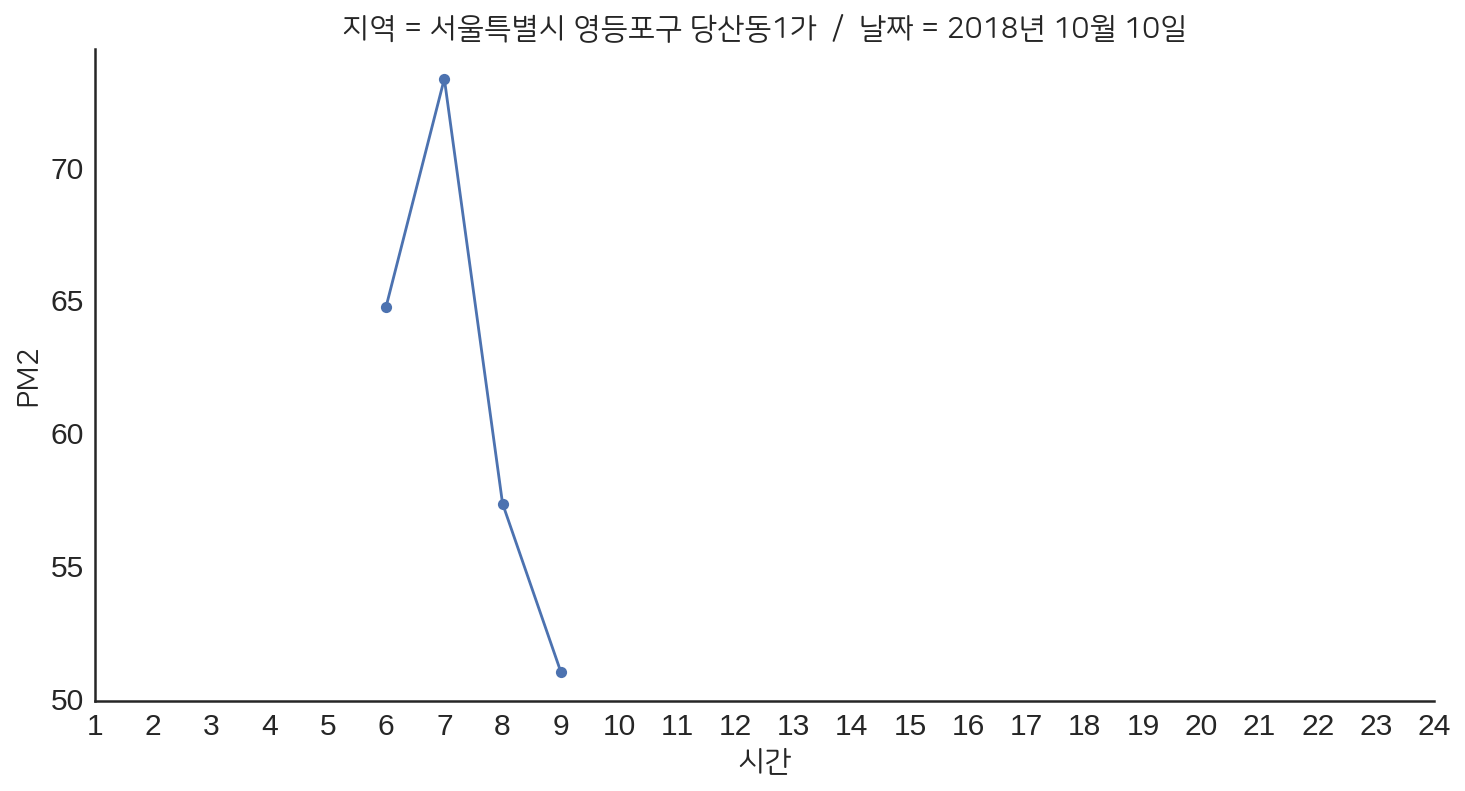

In [28]:
pm2_by_city('서울특별시 영등포구 당산동1가', 2018, 10, 10)